# Dimensionality Reduction Using a Principal Component Analysis

In order to analyze the DrugMatrix data, we will first explore it using dimensionality reduction and cluster analysis. This will allow us to represent the data in a two-dimensional space and find hidden relationships in the data.

### Principal Component Analysis

PCA reduces dimensionality by finding principal components. These are directions  of maximum variation in a dataset. This will allow us to reduce a dataset's original features to a set of new ones based on the principal components. In this way, we end up with the least amount of features that keep the maximum amount of variation about how the data is distributed.

## Preparing data (DM_thigh1/DM_thigh2)

Here we import the DrugMatrix (Thigh) CSV file of drugs and genes from the google drive folder as a dataframe entitled: 'DM_thigh1'

We will use the thigh df to create and explore 2 separate PCA plots: 

### DM_thigh1) Raw data including entire (~31,040) genome and multiple drug dosage levels
### DM_thigh2) Same as one except using only the annotated (23,748) genes in DrugMatrix's database 

In [1]:
import pandas as pd

#Original thigh df
DM_thigh = pd.read_table('https://drive.google.com/uc?export=download&id=0B3bVNa1CiFWdZUtBb2hUamtYY1E', sep='\t')

#DM_thigh1
DM_thigh1 = DM_thigh
DM_thigh1.columns.names = ['Drugs']
DM_thigh1 = DM_thigh1.set_index('Gene')
DM_thigh1.head(100) #show first 100 rows

Drugs,FAMOTIDINE,FAMOTIDINE.1,DICYCLOMINE,DICYCLOMINE.1,BUSPIRONE,FLUNARIZINE,ETIDRONATE,CHLORPROPAMIDE,ETIDRONATE.1,LEVOSULPIRIDE,...,ATENOLOL.1,PENTOXIFYLLINE.1,DEXCHLORPHENIRAMINE.1,TRIMETHADIONE.1,GLYBURIDE.1,AZARIBINE.1,PHENYTOIN.1,GABAPENTIN.1,PAROXETINE.1,OXYBUTYNIN.1
Gene,,,,,,,,,,,,,,,,,,,,,
Map7,0.184,0.026,0.207,-0.010,0.070,0.074,0.108,-0.322,0.145,-0.149,...,0.075,-0.051,0.284,-0.180,-0.014,0.091,0.234,0.147,0.252,0.000
Trh,0.016,-0.184,0.167,0.083,-0.115,0.190,0.302,0.077,0.330,-0.145,...,0.075,0.234,-0.065,-0.104,0.078,-0.251,0.051,0.149,0.258,-0.020
NaN,0.348,0.041,0.187,0.091,-0.346,-0.171,0.107,0.054,0.219,0.105,...,-0.069,-0.009,0.027,-0.232,0.158,-0.056,0.079,-0.143,0.087,-0.114
Cpm,0.450,0.278,0.453,0.088,0.311,0.261,0.448,0.444,0.600,0.211,...,0.338,0.059,0.520,0.169,0.367,0.244,-0.043,0.259,0.182,-0.036
Gas2l3,0.040,-0.018,0.029,0.127,0.227,-0.178,-0.185,0.454,-0.463,0.456,...,0.285,-0.093,-0.529,0.344,0.321,-0.029,0.537,-0.135,-0.087,-0.028
Dicer1,0.009,0.032,0.089,-0.163,-0.221,-0.154,-0.019,-0.470,-0.057,-0.372,...,-0.403,-0.116,0.031,-0.044,-0.352,-0.039,-0.037,-0.012,0.042,-0.076
NaN,0.055,0.001,-0.065,0.048,0.017,0.033,-0.103,0.118,0.050,-0.004,...,0.065,-0.078,0.086,-0.027,0.010,0.017,-0.220,-0.024,-0.014,-0.075
Rbm6,-0.029,-0.059,0.070,-0.004,0.040,0.048,-0.043,0.005,-0.008,0.101,...,0.070,0.003,0.002,-0.019,0.080,-0.074,-0.025,0.015,0.063,0.087
Pianp,0.288,0.281,0.146,-0.009,-0.083,-0.148,-0.142,0.089,0.039,-0.068,...,-0.019,0.013,-0.486,0.108,0.288,0.330,0.020,0.286,0.056,0.083


In [2]:
print len(DM_thigh1.index) -2, "Genes" 
print len(DM_thigh1.columns) -1, "Drugs"

31040 Genes
41 Drugs


In [3]:
#DM_thigh2
DM_thigh2 = DM_thigh.dropna()
DM_thigh2.columns.names = ['Drugs']
DM_thigh2 = DM_thigh2.set_index('Gene')
DM_thigh2.head() #show first 5 rows (default)

Drugs,FAMOTIDINE,FAMOTIDINE.1,DICYCLOMINE,DICYCLOMINE.1,BUSPIRONE,FLUNARIZINE,ETIDRONATE,CHLORPROPAMIDE,ETIDRONATE.1,LEVOSULPIRIDE,...,ATENOLOL.1,PENTOXIFYLLINE.1,DEXCHLORPHENIRAMINE.1,TRIMETHADIONE.1,GLYBURIDE.1,AZARIBINE.1,PHENYTOIN.1,GABAPENTIN.1,PAROXETINE.1,OXYBUTYNIN.1
Gene,,,,,,,,,,,,,,,,,,,,,
Map7,0.184,0.026,0.207,-0.010,0.070,0.074,0.108,-0.322,0.145,-0.149,...,0.075,-0.051,0.284,-0.180,-0.014,0.091,0.234,0.147,0.252,0.000
Trh,0.016,-0.184,0.167,0.083,-0.115,0.190,0.302,0.077,0.330,-0.145,...,0.075,0.234,-0.065,-0.104,0.078,-0.251,0.051,0.149,0.258,-0.020
Cpm,0.450,0.278,0.453,0.088,0.311,0.261,0.448,0.444,0.600,0.211,...,0.338,0.059,0.520,0.169,0.367,0.244,-0.043,0.259,0.182,-0.036
Gas2l3,0.040,-0.018,0.029,0.127,0.227,-0.178,-0.185,0.454,-0.463,0.456,...,0.285,-0.093,-0.529,0.344,0.321,-0.029,0.537,-0.135,-0.087,-0.028
Dicer1,0.009,0.032,0.089,-0.163,-0.221,-0.154,-0.019,-0.470,-0.057,-0.372,...,-0.403,-0.116,0.031,-0.044,-0.352,-0.039,-0.037,-0.012,0.042,-0.076


In [4]:
print len(DM_thigh2.index) -2, "Genes" 
print len(DM_thigh2.columns) -1, "Drugs"

23748 Genes
41 Drugs


We specified index_col to be 0 in order to make the drug names the row labels. We used the '\t' separator because our csv is actually tab-delimited (not comma). The head() function shows the first 5 lines (by defalult) to ensure our output is correct.

## Dimensionality Reduction(DM_thigh1)

Ideally at this point we want to represent each drug in a two dimensional space. This dataset has each sample as a drug defined by 41 different variables - each corresponding to a distinct drug (or drug dosage).  

Python's Sci-kit machine learning library comes with PCA implementation

In [2]:

from sklearn.decomposition import PCA
pca1 = PCA(n_components=8)
pca1.fit(DM_thigh1)

DM_2d1 = pca1.transform(DM_thigh1)

DM_thigh1_2d = pd.DataFrame(DM_2d1)
DM_thigh1_2d.index = DM_thigh1.index
DM_thigh1_2d.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']
DM_thigh1_2d.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Gene,,,,,,,,
Map7,-0.159859,-0.528326,0.177416,-0.180326,0.260178,0.061338,-0.109632,-0.226402
Trh,0.086066,-0.508673,-0.117862,-0.328542,-0.040128,0.251176,-0.278545,0.229558
NaN,-0.002172,0.039220,-0.246994,-0.291297,-0.024045,-0.090565,0.018201,-0.132792
Cpm,1.206351,-0.440030,-0.474593,-0.700111,0.489537,-0.087842,0.220139,-0.407740
Gas2l3,0.839991,0.295755,0.752818,0.304411,-0.482794,0.053818,-0.187834,-0.019794


Here we transformed our data into a lower representation and put it into a new dataframe: 'DM_thigh1_2d'

We also can check the explained variance ratio as shown below.

In [8]:
print(pca1.explained_variance_ratio_)

[ 0.23057253  0.09583619  0.06858537  0.05560127]


## TSNE plot unadjusted

In [ ]:
%pylab inline
from sklearn.manifold import TSNE
#Need to adjust TSNE parameters; crashes notebook
X_tsne = TSNE(learning_rate=100).fit_transform(DM_thigh1_2d)
X_pca = PCA().fit_transform(DM_thigh1_2d)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
figure(figsize=(10, 5))#Need to adjust TSNE parameters; crashes notebook
subplot(121)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=DM_thigh1_2d.target)
subplot(122)
scatter(X_pca[:, 0], X_pca[:, 1], c=DM_thigh1_2d.target)

## Dimensionality Reduction (DM_thigh2)

In [5]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca2.fit(DM_thigh2)

DM_2d2 = pca2.transform(DM_thigh2)

DM_thigh2_2d = pd.DataFrame(DM_2d2)
DM_thigh2_2d.index = DM_thigh2.index
DM_thigh2_2d.columns = ['PC1','PC2']
DM_thigh2_2d.head()

,PC1,PC2
Gene,,
Map7,-0.087338,-0.549850
Trh,0.149256,-0.500236
Cpm,1.267970,-0.426050
Gas2l3,0.892089,0.307768
Dicer1,-1.026504,-0.265157


In [6]:
print(pca2.explained_variance_ratio_)

[ 0.24849679  0.09730342]


## Plotting the data (DM_thigh1)

Here all we have to do is to call plot on the dataframe. We can add annotation loops that tag every point with it's drug name.

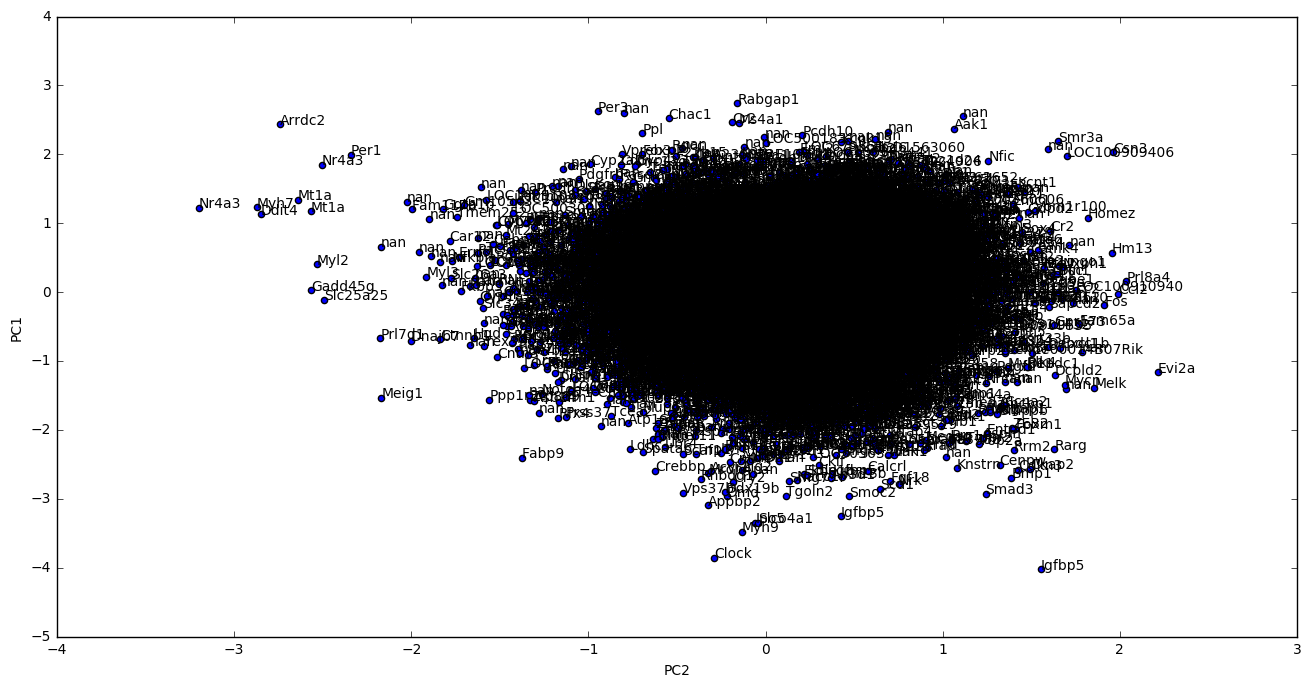

In [7]:
%matplotlib inline

ax = DM_thigh1_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, Drug in enumerate(DM_thigh1.index):
    ax.annotate(Drug, (DM_thigh1_2d.iloc[i].PC2, DM_thigh1_2d.iloc[i].PC1))

Additionally we can create a bubble chart to visualize the mean value for all the side effects of a particular drug corresponding to point size. First we'll add a new column containing the scaled mean per drug across all the side effects.

In [8]:
from sklearn.preprocessing import normalize

DM_thigh1_2d['Drug_mean'] = pd.Series(DM_thigh1.mean(axis=1), index=DM_thigh1_2d.index)
Drug_mean_max = DM_thigh1_2d['Drug_mean'].max()
Drug_mean_min = DM_thigh1_2d['Drug_mean'].min()
Drug_mean_scaled = (DM_thigh1_2d.Drug_mean-Drug_mean_min) / Drug_mean_max
DM_thigh1_2d['Drug_mean_scaled'] = pd.Series(
    Drug_mean_scaled, 
    index=DM_thigh1_2d.index)
DM_thigh1_2d.head()

,PC1,PC2,Drug_mean,Drug_mean_scaled
Gene,,,,
Map7,-0.159859,-0.528326,0.027476,1.322631
Trh,0.086066,-0.508673,0.034524,1.336587
NaN,-0.002172,0.039220,-0.002238,1.263791
Cpm,1.206351,-0.440030,0.217905,1.699717
Gas2l3,0.839991,0.295755,0.083833,1.434229


Now we can plot using variable size, omitting Drug name.

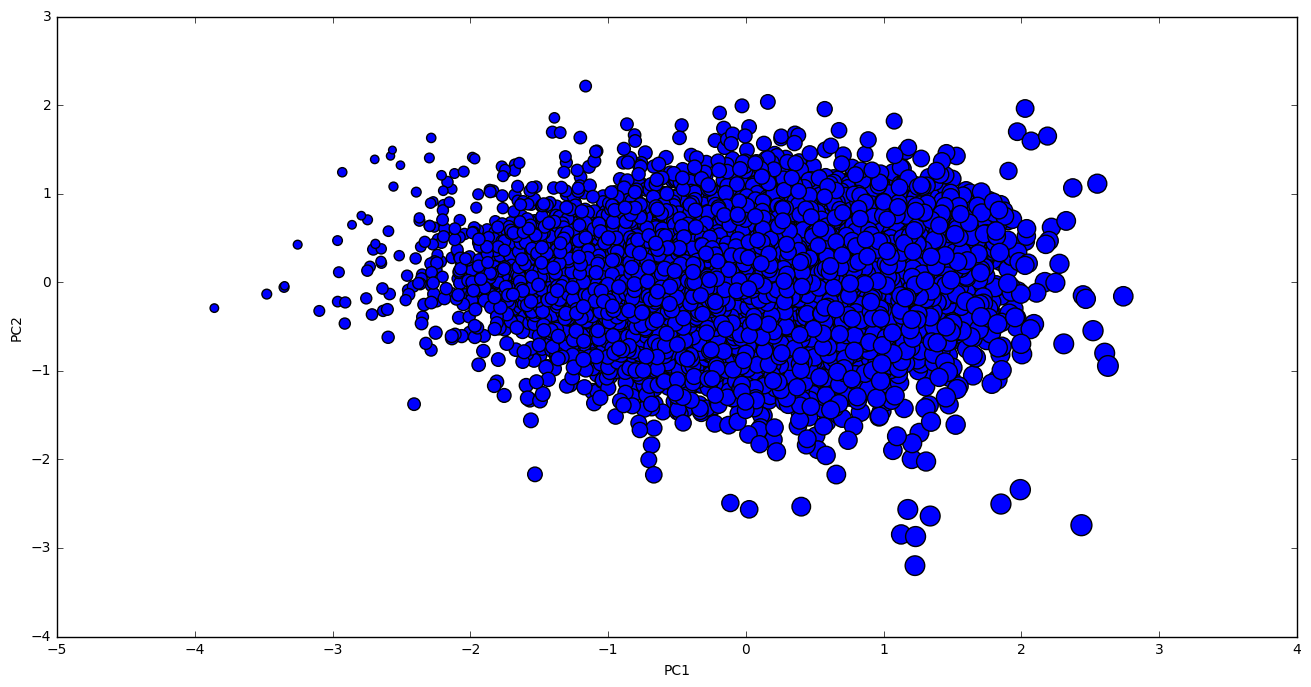

In [9]:
DM_thigh1_2d.plot(kind='scatter', x='PC1', y='PC2', s=DM_thigh1_2d['Drug_mean_scaled']*100, figsize=(16,8))

We can also do the same with the sum as opposed to the mean to compare.

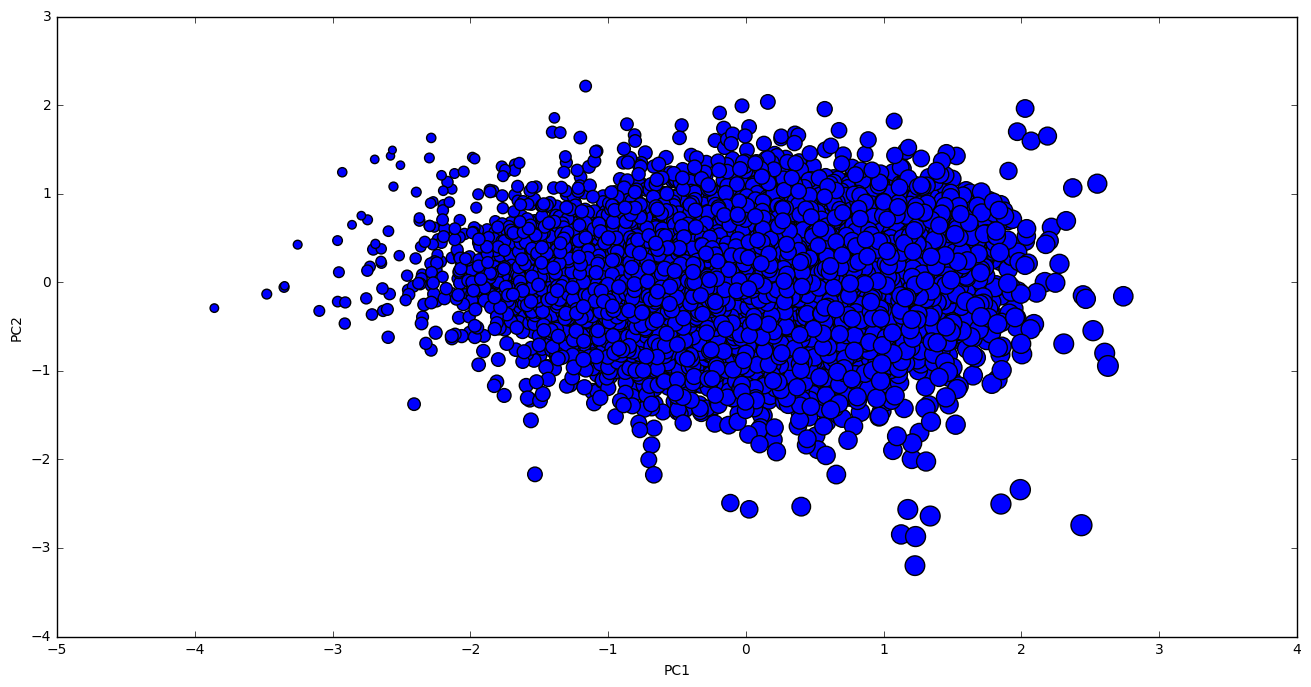

In [10]:
from sklearn.preprocessing import normalize

DM_thigh1_2d['Drug_sum'] = pd.Series(DM_thigh1.sum(axis=1), index=DM_thigh1_2d.index)
Drug_sum_max = DM_thigh1_2d['Drug_sum'].max()
Drug_sum_min = DM_thigh1_2d['Drug_sum'].min()
Drug_sum_scaled = (DM_thigh1_2d.Drug_sum-Drug_sum_min) / Drug_sum_max
DM_thigh1_2d['Drug_sum_scaled'] = pd.Series(
    Drug_sum_scaled, 
    index=DM_thigh1_2d.index)
DM_thigh1_2d.head()
DM_thigh1_2d.plot(kind='scatter', x='PC1', y='PC2', s=DM_thigh1_2d['Drug_sum_scaled']*100, figsize=(16,8))

From this preliminary data, we can see that there is not much variation overall, but most of it is along the x-axis, which corresponds to our first principal component. Unfortunately, with 41 features (drugs) within the data of 31,040 samples (genes), this first principal component only comprises ~23% of the variance. Combined with the second principal component (~10%) we still only account for about ~33% of the variance using these two components. So let's look at a few more components and see if we can capture a majority of the variance:

In [11]:
pca1 = PCA(n_components=4)
pca1.fit(DM_thigh1)
print(pca1.explained_variance_ratio_)

[ 0.23057253  0.09583619  0.06858537  0.05560127]


At four components, we capture ~46% of the variance...

In [12]:
pca1 = PCA(n_components=8)
pca1.fit(DM_thigh1)
print(pca1.explained_variance_ratio_)

[ 0.23057253  0.09583619  0.06858537  0.05560127  0.04264997  0.03361644
  0.02906244  0.02423309]


...And at 8 components we capture ~59% of the variance. So in this case, because there is not much variability within the data, we would be better served to use more principal components to accurately reduce the dimensionality of this dataset from 41 to 8. Alternatively, we can update the dataset with more data  or take out multiple drug dosages and then be able to capture more variability with less dimensions.

We can visualize both the individual explained variance ratio of each principal component, as well as the cumulative variance ratio as follows:

In [13]:
import matplotlib.pyplot as plt

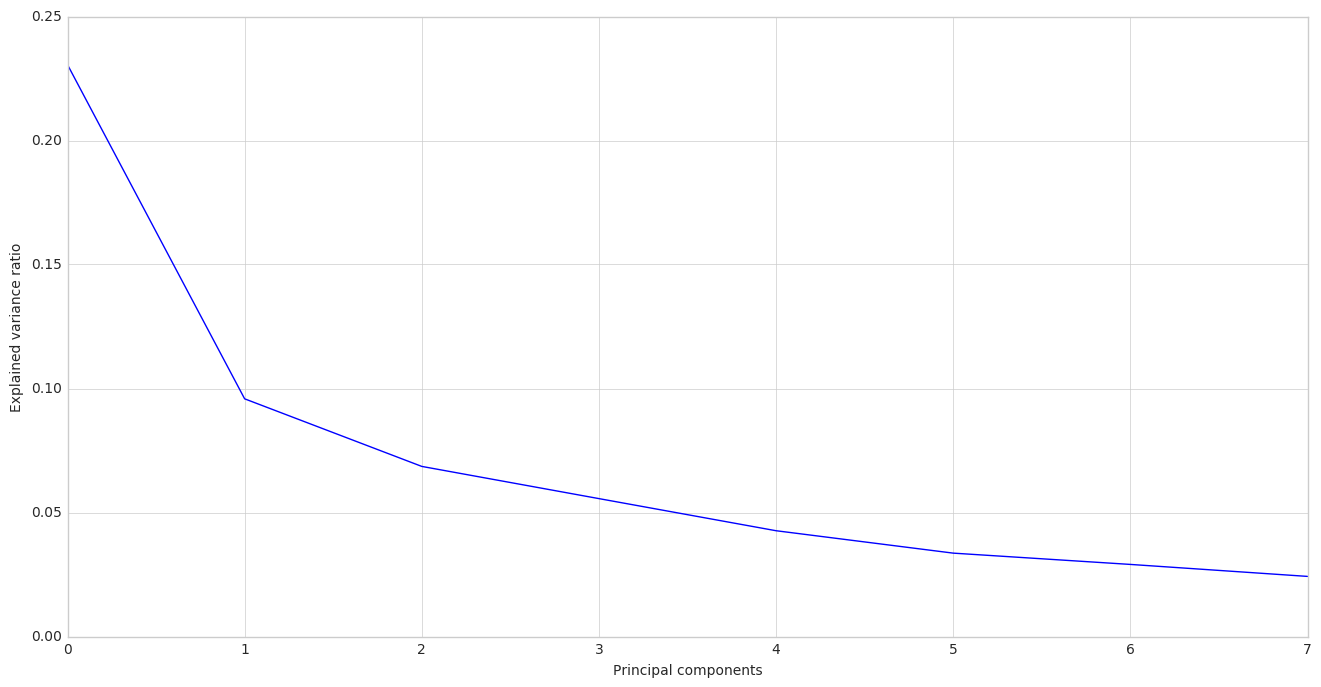

In [14]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 8));
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.plot(pca1.explained_variance_ratio_);

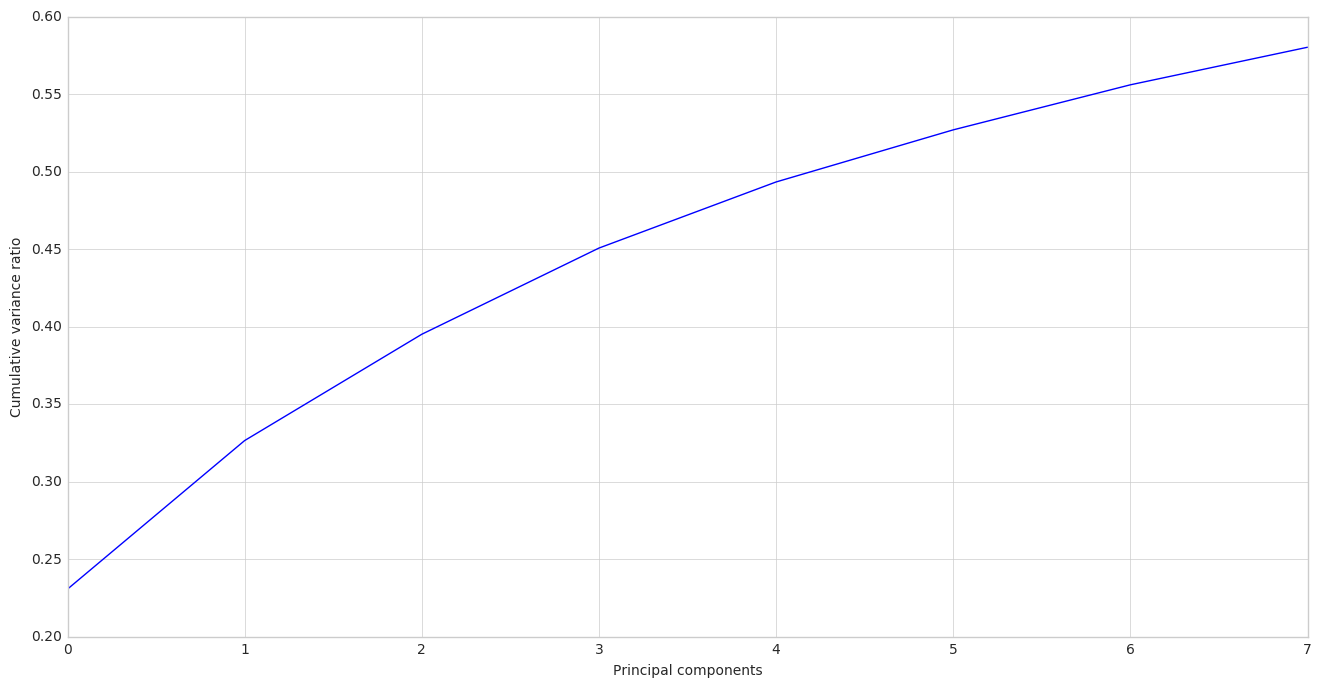

In [15]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 8));
    plt.ylabel('Cumulative variance ratio')
    plt.xlabel('Principal components')
    plt.plot(pca1.explained_variance_ratio_.cumsum());

## Plotting the Data (DM_thigh2)

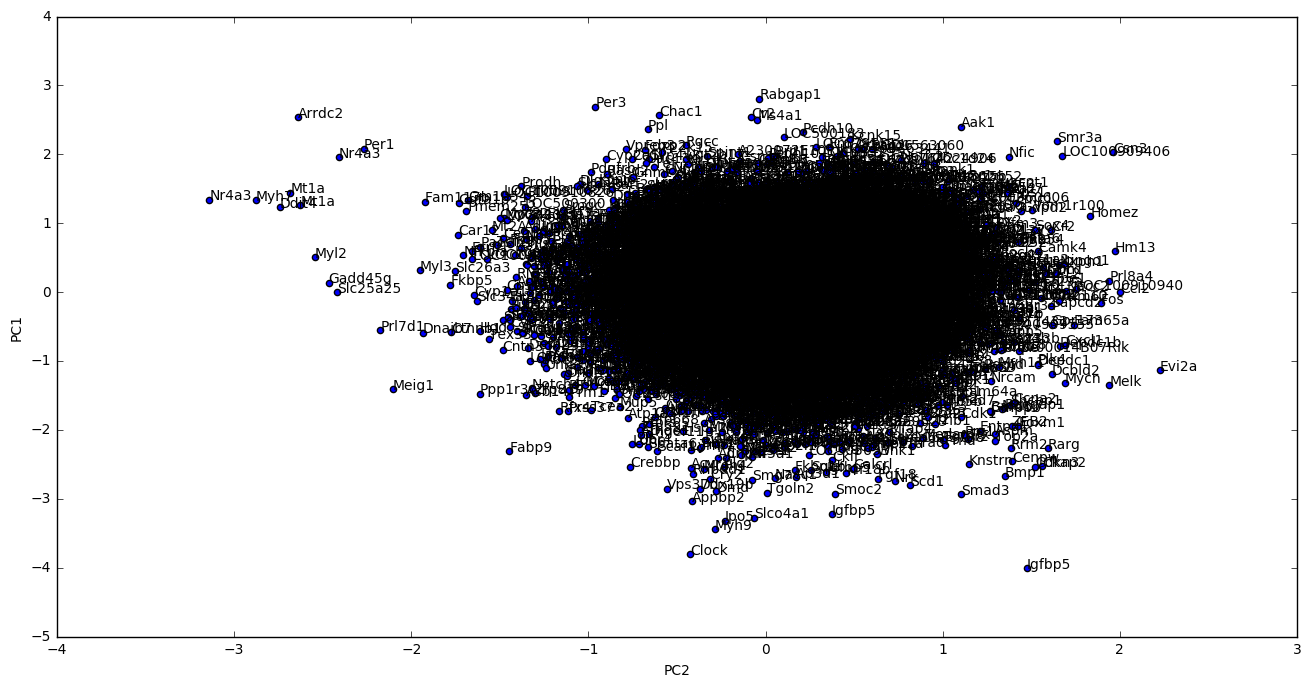

In [16]:
%matplotlib inline

ax = DM_thigh2_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, Drug in enumerate(DM_thigh2.index):
    ax.annotate(Drug, (DM_thigh2_2d.iloc[i].PC2, DM_thigh2_2d.iloc[i].PC1))

In [17]:
DM_thigh2_2d['Drug_mean'] = pd.Series(DM_thigh2.mean(axis=1), index=DM_thigh2_2d.index)
Drug_mean_max = DM_thigh2_2d['Drug_mean'].max()
Drug_mean_min = DM_thigh2_2d['Drug_mean'].min()
Drug_mean_scaled = (DM_thigh2_2d.Drug_mean-Drug_mean_min) / Drug_mean_max
DM_thigh2_2d['Drug_mean_scaled'] = pd.Series(
    Drug_mean_scaled, 
    index=DM_thigh2_2d.index)
DM_thigh2_2d.head()

,PC1,PC2,Drug_mean,Drug_mean_scaled
Gene,,,,
Map7,-0.087338,-0.549850,0.027476,1.322631
Trh,0.149256,-0.500236,0.034524,1.336587
Cpm,1.267970,-0.426050,0.217905,1.699717
Gas2l3,0.892089,0.307768,0.083833,1.434229
Dicer1,-1.026504,-0.265157,-0.110381,1.049646


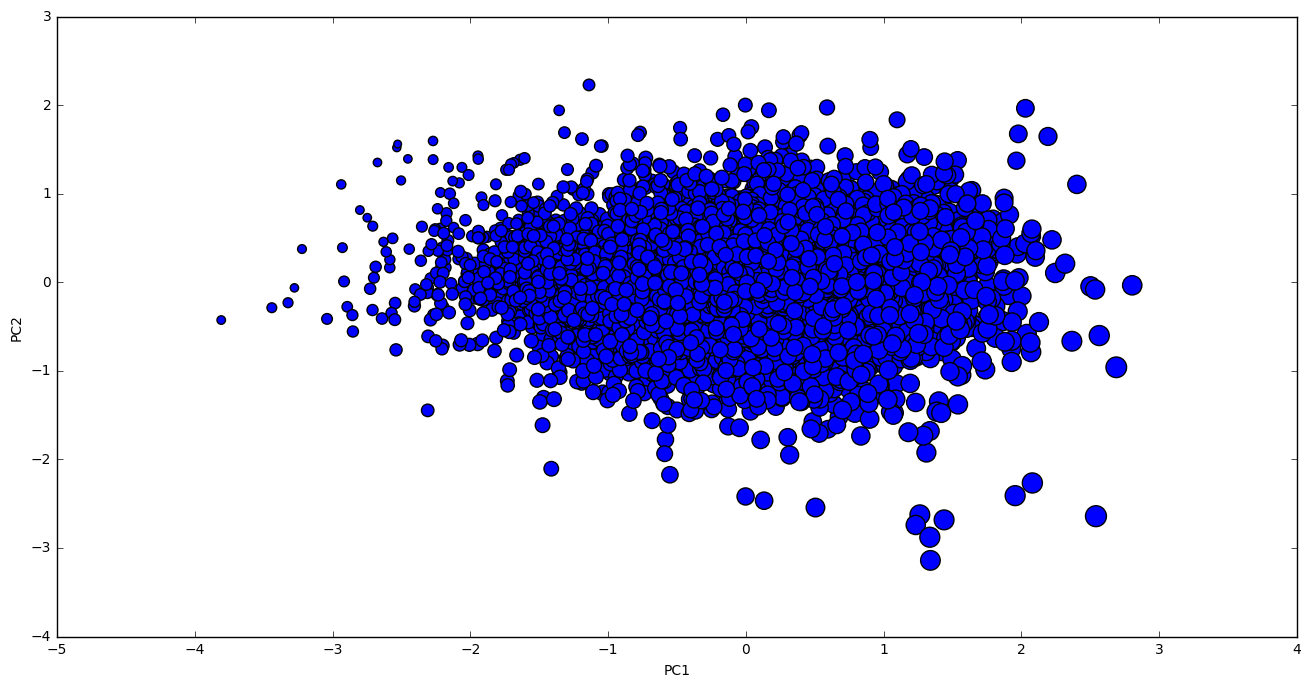

In [18]:
DM_thigh2_2d.plot(kind='scatter', x='PC1', y='PC2', s=DM_thigh2_2d['Drug_mean_scaled']*100, figsize=(16,8))

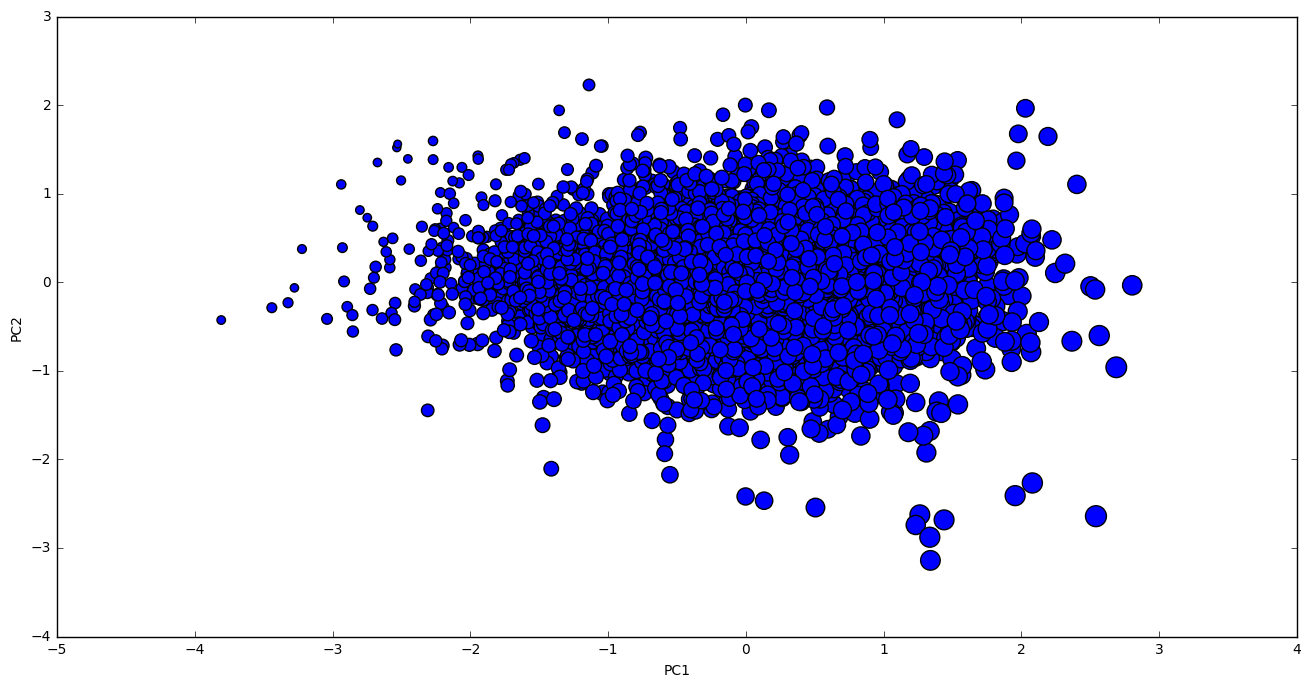

In [19]:
DM_thigh2_2d['Drug_sum'] = pd.Series(DM_thigh2.sum(axis=1), index=DM_thigh2_2d.index)
Drug_sum_max = DM_thigh2_2d['Drug_sum'].max()
Drug_sum_min = DM_thigh2_2d['Drug_sum'].min()
Drug_sum_scaled = (DM_thigh2_2d.Drug_sum-Drug_sum_min) / Drug_sum_max
DM_thigh2_2d['Drug_sum_scaled'] = pd.Series(
    Drug_sum_scaled, 
    index=DM_thigh2_2d.index)
DM_thigh2_2d.head()
DM_thigh2_2d.plot(kind='scatter', x='PC1', y='PC2', s=DM_thigh2_2d['Drug_sum_scaled']*100, figsize=(16,8))

In [20]:
pca2 = PCA(n_components=4)
pca2.fit(DM_thigh2)
print(pca2.explained_variance_ratio_)

[ 0.24849679  0.09730342  0.06764929  0.05795371]


In [21]:
pca2 = PCA(n_components=8)
pca2.fit(DM_thigh2)
print(pca2.explained_variance_ratio_)

[ 0.24849679  0.09730342  0.06764929  0.05795371  0.03967692  0.03568013
  0.02884523  0.02409613]


### Though the plots look similar, the explained variance ratio slightly increased with ~7,000 less genes that were not annotated in DrugMatrix's database.

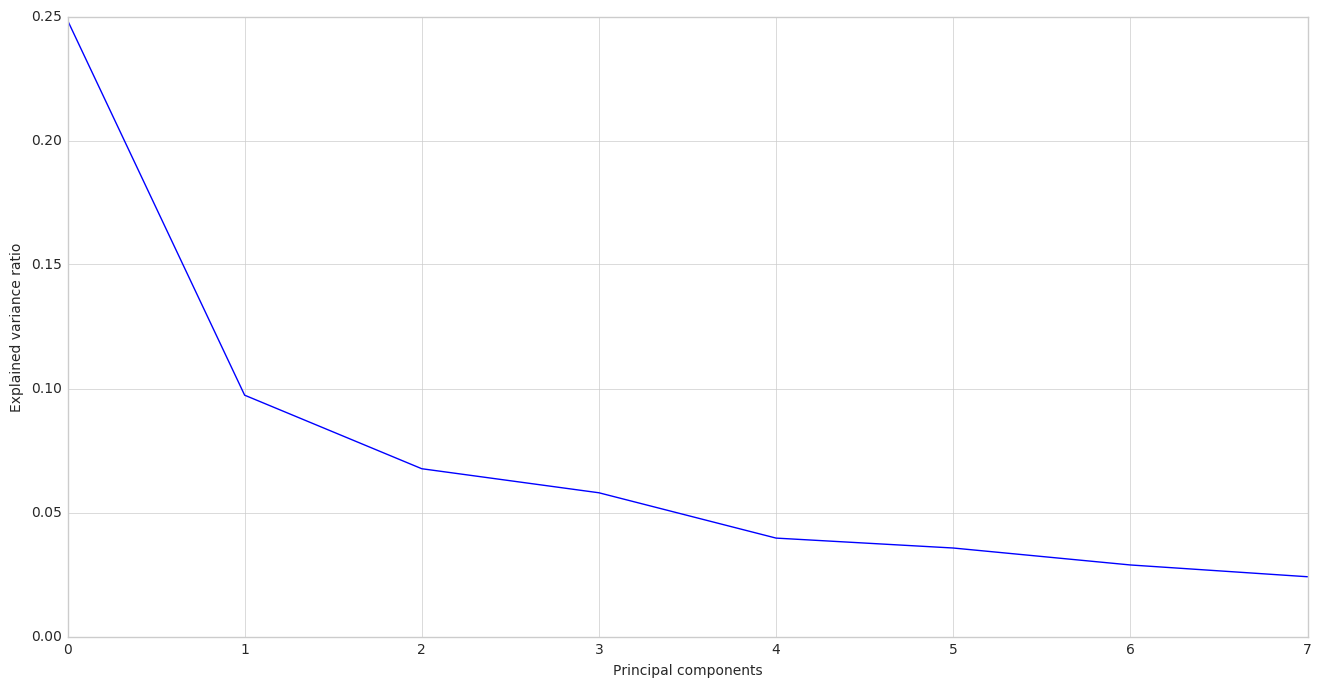

In [22]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 8));
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.plot(pca2.explained_variance_ratio_);

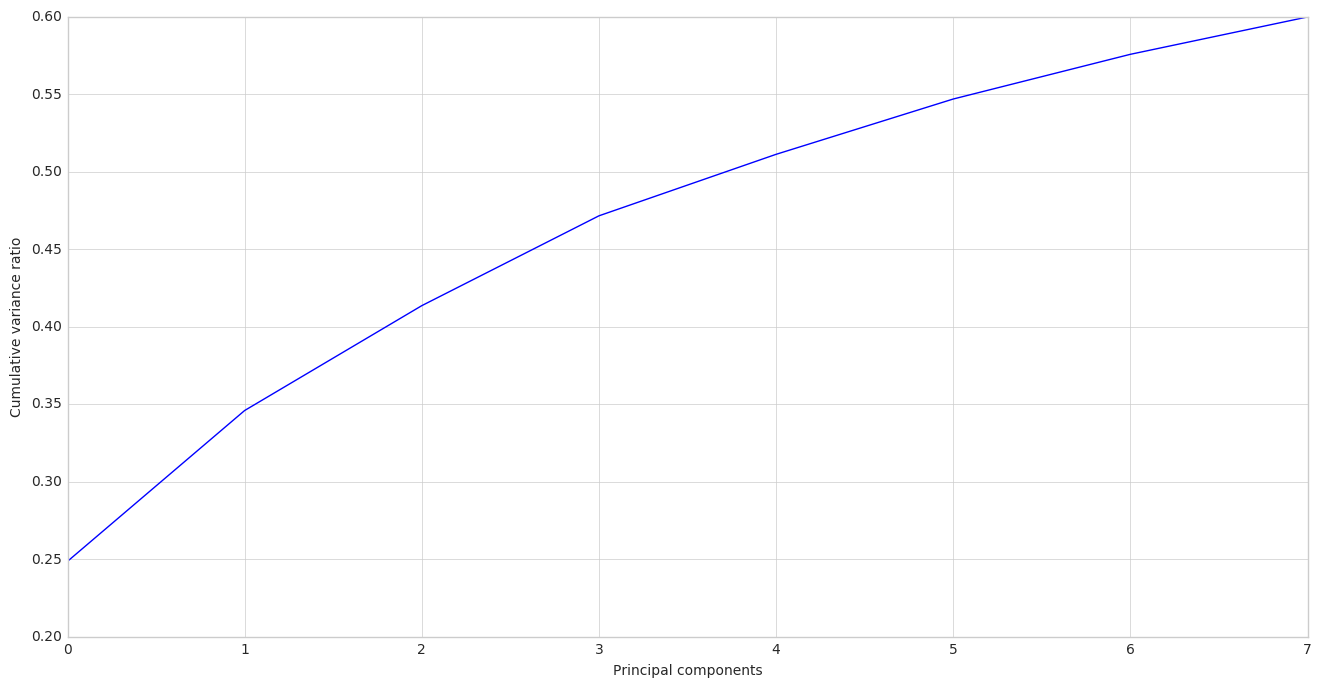

In [23]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 8));
    plt.ylabel('Cumulative variance ratio')
    plt.xlabel('Principal components')
    plt.plot(pca2.explained_variance_ratio_.cumsum());